<a href="https://colab.research.google.com/github/awhitehouse1/DS4002-Project-1/blob/main/Vader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install nltk

In [3]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.5 MB/s eta 0:00:00


In [4]:
# Import necessary libraries
import pandas as pd
import re
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk

In [5]:
# Download stopwords if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
# Load the CSV file into a DataFrame
df = pd.read_csv('amazon_reviews.csv')

In [8]:
# Drop the unwanted columns
df = df.drop(columns=['score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'])

In [9]:
# Pre-process the 'reviewText' column
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text


In [10]:
df['cleaned_reviewText'] = df['reviewText'].apply(lambda x: preprocess_text(str(x)))

In [11]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [12]:
# Apply sentiment analysis on the pre-processed 'cleaned_reviewText' column
df['sentiment_scores'] = df['cleaned_reviewText'].apply(lambda x: analyzer.polarity_scores(x))

In [13]:
# Extract the compound score as the overall sentiment score
df['compound_score'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])


In [14]:
# Display the first few rows of the processed DataFrame
print(df[['reviewerName', 'reviewText', 'cleaned_reviewText', 'compound_score']].head())

   reviewerName                                         reviewText  \
0           NaN                                         No issues.   
1          0mie  Purchased this for my device, it worked as adv...   
2           1K3  it works as expected. I should have sprung for...   
3           1m2  This think has worked out great.Had a diff. br...   
4  2&amp;1/2Men  Bought it with Retail Packaging, arrived legit...   

                                  cleaned_reviewText  compound_score  
0                                             issues          0.0000  
1  purchased device worked advertised never much ...          0.0000  
2  works expected sprung higher capacity think ma...          0.4019  
3  think worked greathad diff bran gb card went s...          0.6486  
4  bought retail packaging arrived legit orange e...          0.8591  


In [15]:
# Checking for correlation between compound score and overall rating
# Ensure 'overall' column is present in the dataframe and is numeric
df['overall'] = pd.to_numeric(df['overall'], errors='coerce')

In [16]:
# Check for correlation between 'compound_score' and 'overall'
correlation = df['compound_score'].corr(df['overall'])

In [17]:
print(f"The correlation between the compound score and the overall rating is: {correlation}")

The correlation between the compound score and the overall rating is: 0.3185488215615132


In [18]:
# The correlation is 0.3185 (interesting...)

In [19]:
pip install matplotlib seaborn

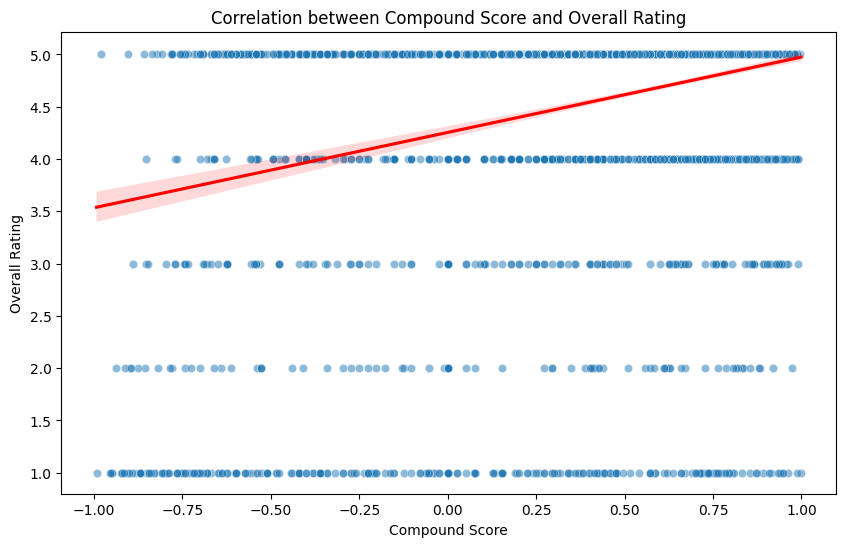

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='compound_score', y='overall', data=df, alpha=0.5)

# Add a line of best fit
sns.regplot(x='compound_score', y='overall', data=df, scatter=False, color='red')

# Add labels and title
plt.title('Correlation between Compound Score and Overall Rating')
plt.xlabel('Compound Score')
plt.ylabel('Overall Rating')

# Display the plot
plt.show()


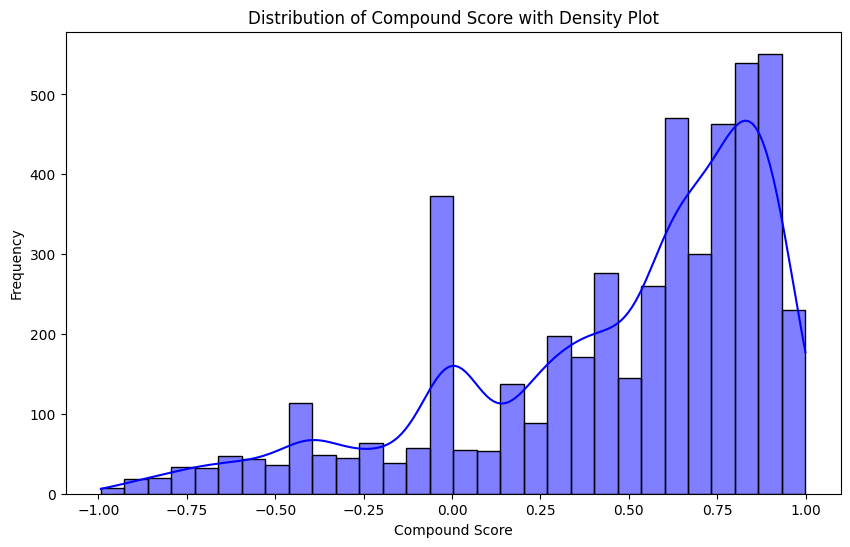

In [21]:
# Above graph does not make much sense because overall (rating) is not a continuous variable
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(10, 6))

# Plot the histogram with a density line for the compound score
sns.histplot(df['compound_score'], kde=True, bins=30, color='blue', edgecolor='black')

# Add labels and title
plt.title('Distribution of Compound Score with Density Plot')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')

# Display the plot
plt.show()


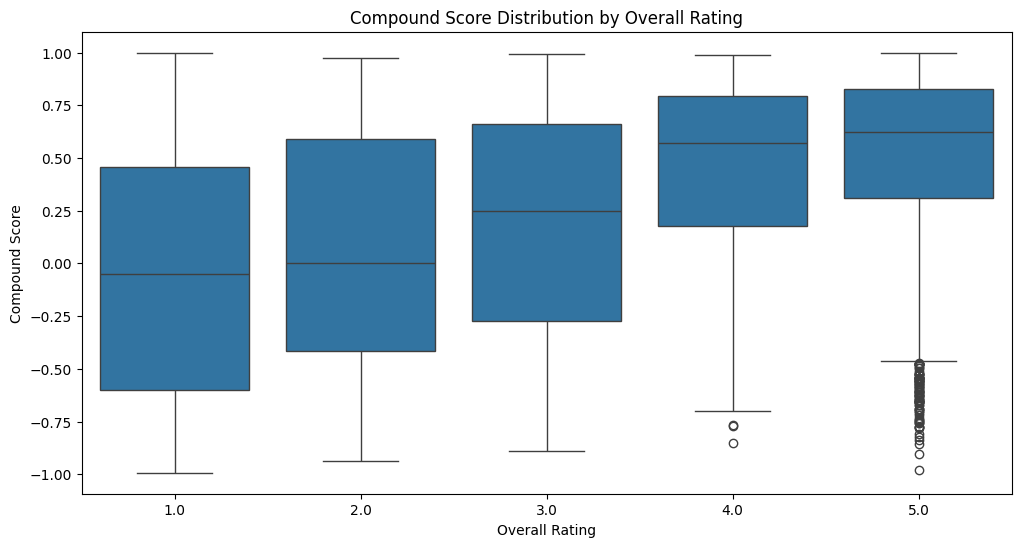

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(12, 6))

# Create a box plot to show the distribution of compound scores across overall ratings
sns.boxplot(x='overall', y='compound_score', data=df)

# Add labels and title
plt.title('Compound Score Distribution by Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Compound Score')

# Display the plot
plt.show()


In [ ]:
# this plot shows that neutral compound scores were on average given more so to
# 1 and 2 star ratings.
# also shows that compound scores do grow as ratings increase.
# there are a lot of outliers in 5 star ratings (probably due to our data being
# heavily weighted by the 5 star ratings).

<ipython-input-23-2320f438e179>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='overall', y='compound_score', data=df, inner='box', palette='muted')


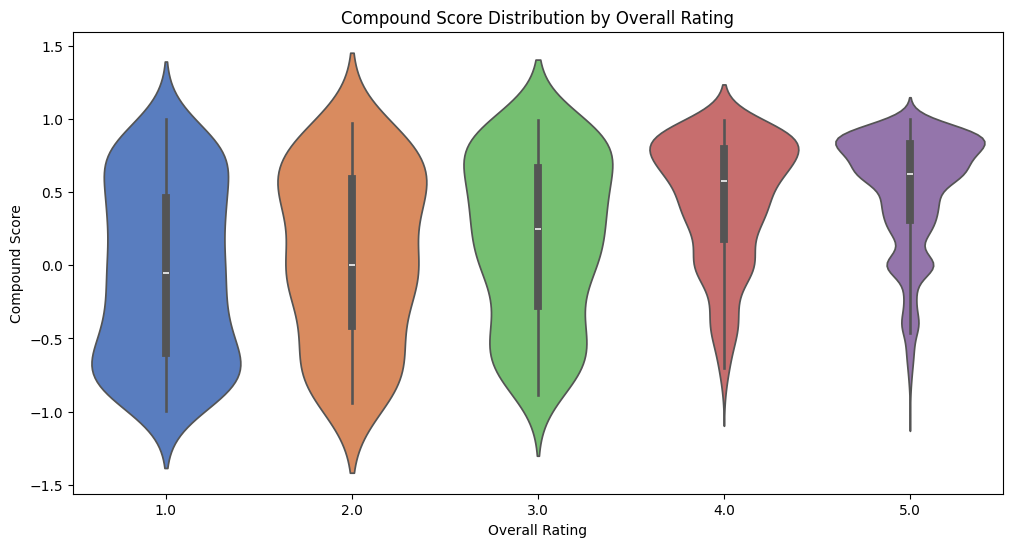

In [23]:
# Set up the figure
plt.figure(figsize=(12, 6))

# Create a violin plot to show the distribution of compound scores across overall ratings
sns.violinplot(x='overall', y='compound_score', data=df, inner='box', palette='muted')

# Add labels and title
plt.title('Compound Score Distribution by Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Compound Score')

# Display the plot
plt.show()


In [ ]:
# higher compound scores given for 2-5 stars...
# denser around the lower compound scores for 1 star

In [24]:
pip install wordcloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


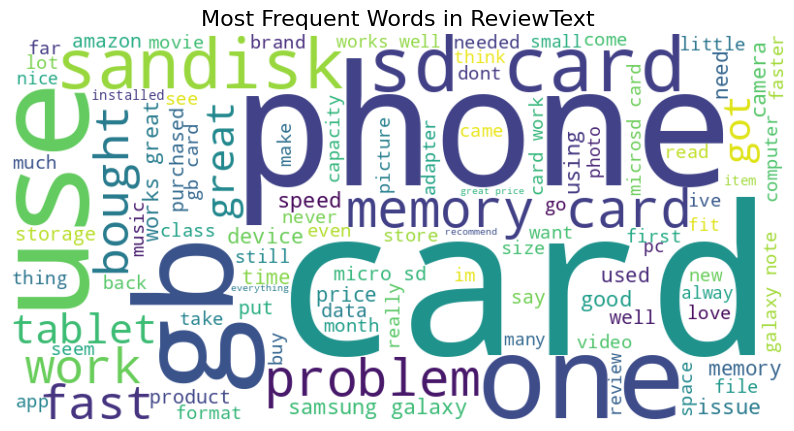

In [25]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already done
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Combine all reviews into a single string
all_reviews = ' '.join(df['reviewText'].dropna().astype(str))

# Pre-process the text: remove non-alphabetic characters, convert to lowercase, and remove stop words
processed_reviews = re.sub(r'[^a-zA-Z\s]', '', all_reviews).lower()
processed_reviews = ' '.join([word for word in processed_reviews.split() if word not in stop_words])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100,
                      colormap='viridis').generate(processed_reviews)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in ReviewText', fontsize=16)
plt.show()

# Created a word plot to show any high frequency words in the reviews

In [26]:
pip install joypy matplotlib pandas

<Figure size 1200x800 with 0 Axes>

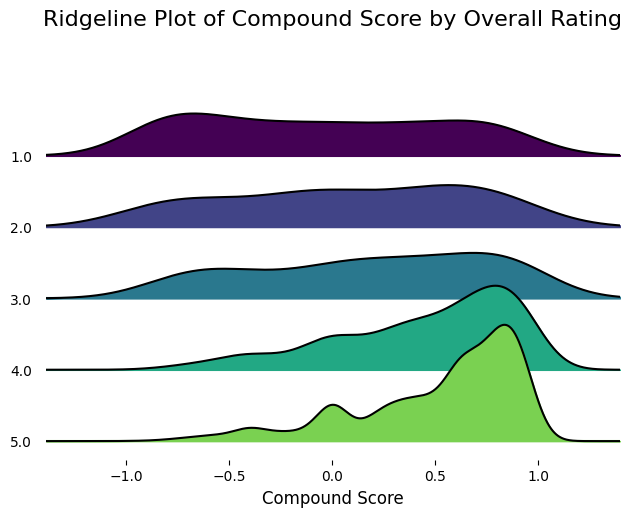

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import joypy

# Create the ridgeline plot
plt.figure(figsize=(12, 8))
joypy.joyplot(df, by='overall', column='compound_score', colormap=plt.cm.viridis)

# Set the x and y labels and the title
plt.xlabel('Compound Score', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Ridgeline Plot of Compound Score by Overall Rating', fontsize=16)

# Display the plot
plt.show()


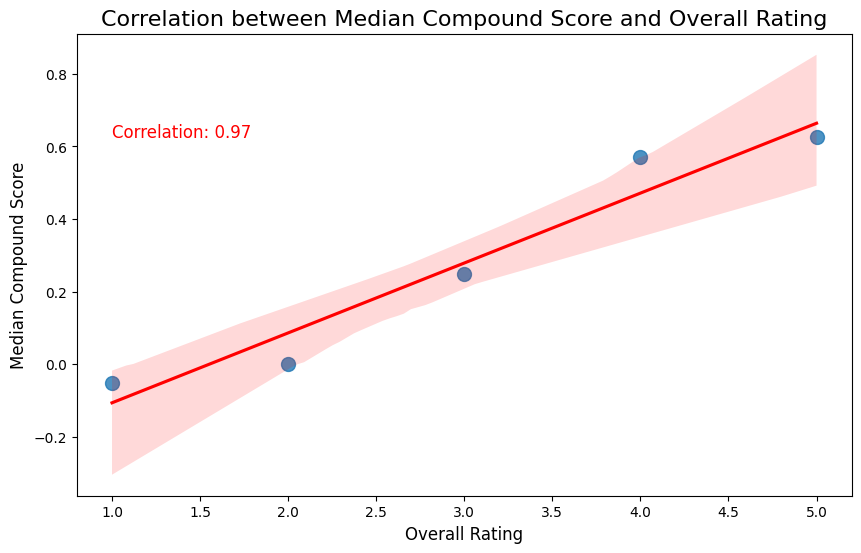

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Calculate the median compound score for each overall rating
median_scores = df.groupby('overall')['compound_score'].median().reset_index()

# Calculate the correlation coefficient between overall rating and median compound score
correlation, _ = pearsonr(median_scores['overall'], median_scores['compound_score'])

# Create the scatter plot with a line of best fit
plt.figure(figsize=(10, 6))
sns.regplot(x='overall', y='compound_score', data=median_scores, scatter_kws={'s': 100}, line_kws={"color": "red"})

# Add correlation value to the plot
plt.text(x=median_scores['overall'].min(),
         y=median_scores['compound_score'].max(),
         s=f'Correlation: {correlation:.2f}', fontsize=12, color='red')

# Add labels and title
plt.title('Correlation between Median Compound Score and Overall Rating', fontsize=16)
plt.xlabel('Overall Rating', fontsize=12)
plt.ylabel('Median Compound Score', fontsize=12)

# Display the plot
plt.show()


In [ ]:
# graph above illustrates a stronger correlation but is based on just the median
# and does not include the outliers
# outliers carry A LOT of weight

In [ ]:
# next step: look at words in 4 and 5 star reviews that cause outliers